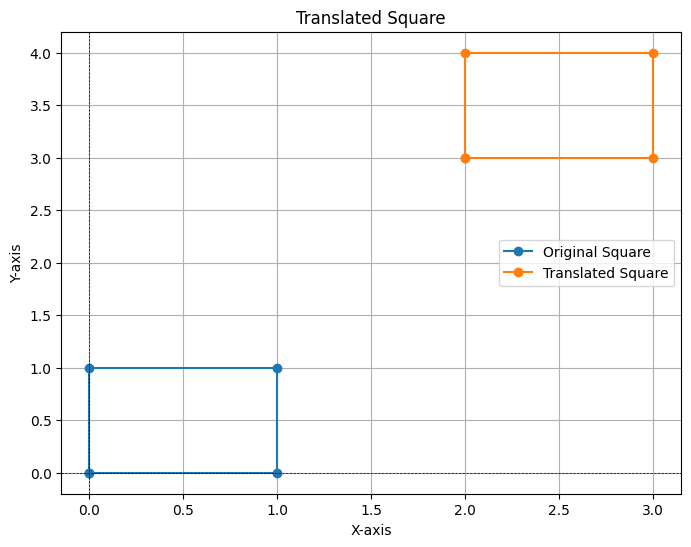

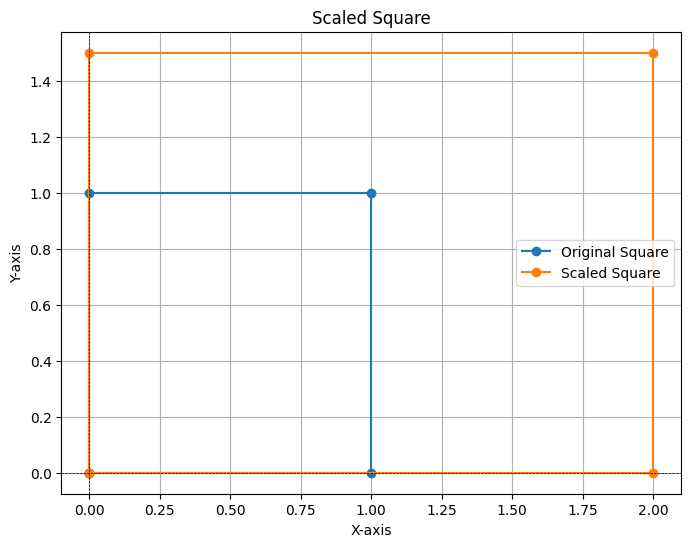

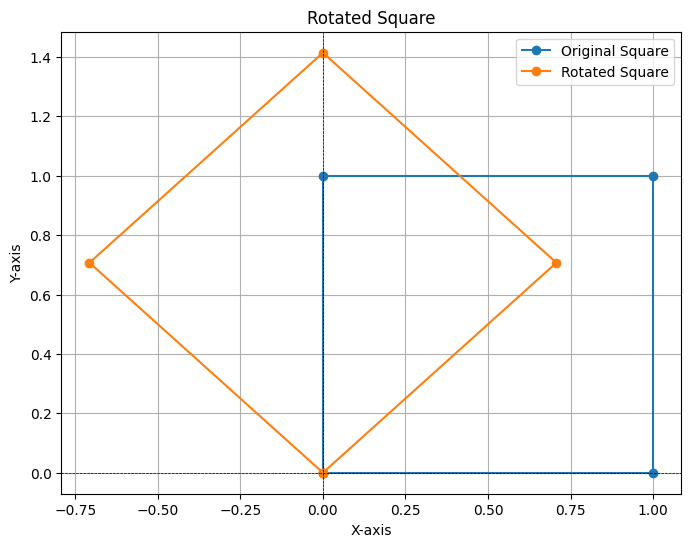

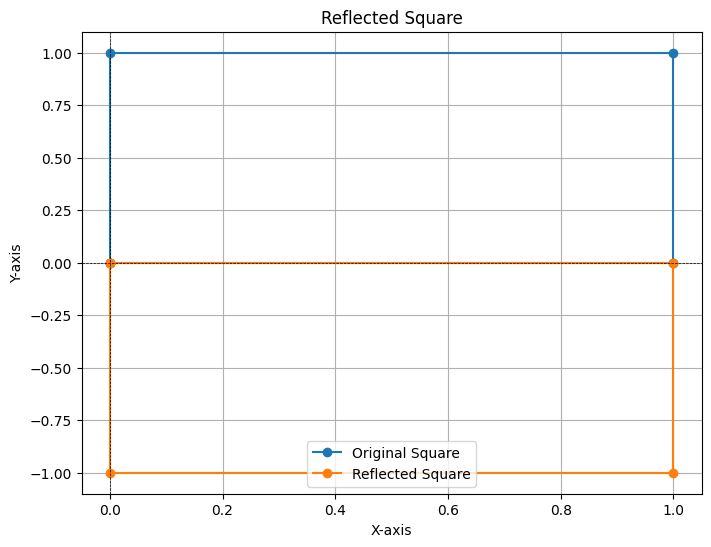

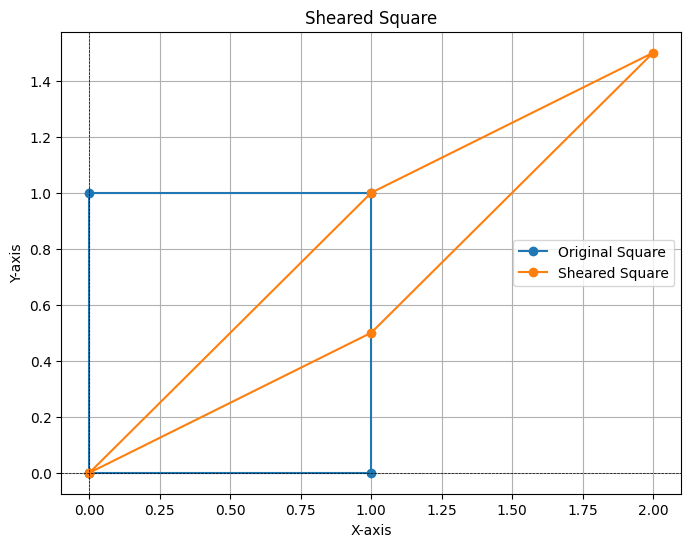

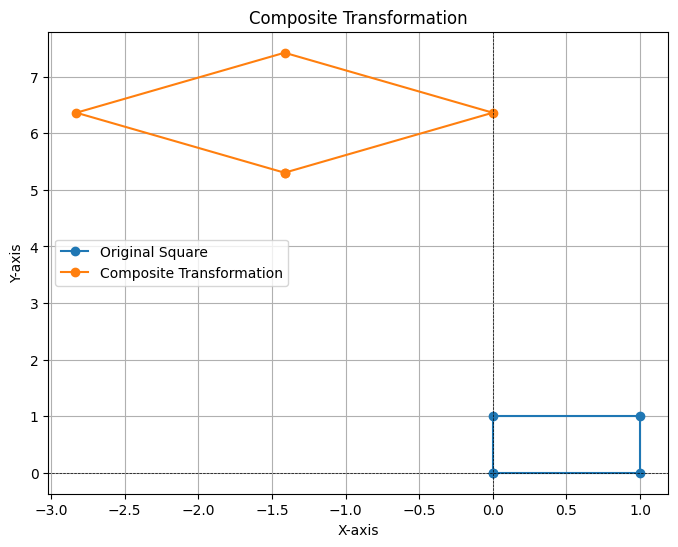

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to apply a transformation matrix to the object
def apply_transformation(vertices, transformation_matrix):
    return np.dot(transformation_matrix, vertices)

# Define the square vertices (homogeneous coordinates)
square = np.array([
    [0, 1, 1, 0, 0],  # x-coordinates
    [0, 0, 1, 1, 0],  # y-coordinates
    [1, 1, 1, 1, 1]   # Homogeneous coordinate for transformations
])

# 1. Translation
def translate(vertices, tx, ty):
    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    return apply_transformation(vertices, translation_matrix)

# 2. Scaling
def scale(vertices, sx, sy):
    scaling_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    return apply_transformation(vertices, scaling_matrix)

# 3. Rotation
def rotate(vertices, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    rotation_matrix = np.array([
        [np.cos(angle_radians), -np.sin(angle_radians), 0],
        [np.sin(angle_radians),  np.cos(angle_radians), 0],
        [0, 0, 1]
    ])
    return apply_transformation(vertices, rotation_matrix)

# 4. Reflection
def reflect(vertices, axis):
    if axis == "x":
        reflection_matrix = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == "y":
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    elif axis == "origin":
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    return apply_transformation(vertices, reflection_matrix)

# 5. Shearing
def shear(vertices, shx, shy):
    shearing_matrix = np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])
    return apply_transformation(vertices, shearing_matrix)

# Composite Transformation
def composite_transformation(vertices, transformations):
    composite_matrix = np.eye(3)
    for transform in transformations:
        composite_matrix = np.dot(transform, composite_matrix)
    return apply_transformation(vertices, composite_matrix)

# Plot function
def plot_transformations(original, transformed, title):
    plt.figure(figsize=(8, 6))
    plt.plot(original[0], original[1], label="Original Square", marker="o")
    plt.plot(transformed[0], transformed[1], label=title, marker="o")
    plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid()
    plt.show()

# Demonstrate each transformation
translated_square = translate(square, 2, 3)
scaled_square = scale(square, 2, 1.5)
rotated_square = rotate(square, 45)
reflected_square = reflect(square, "x")
sheared_square = shear(square, 1, 0.5)

# Composite Transformation: Translate -> Rotate -> Scale
composite_square = composite_transformation(square, [
    np.array([
        [1, 0, 2],
        [0, 1, 3],
        [0, 0, 1]
    ]),
    np.array([
        [np.cos(np.radians(45)), -np.sin(np.radians(45)), 0],
        [np.sin(np.radians(45)),  np.cos(np.radians(45)), 0],
        [0, 0, 1]
    ]),
    np.array([
        [2, 0, 0],
        [0, 1.5, 0],
        [0, 0, 1]
    ])
])

# Plot results
plot_transformations(square, translated_square, "Translated Square")
plot_transformations(square, scaled_square, "Scaled Square")
plot_transformations(square, rotated_square, "Rotated Square")
plot_transformations(square, reflected_square, "Reflected Square")
plot_transformations(square, sheared_square, "Sheared Square")
plot_transformations(square, composite_square, "Composite Transformation")


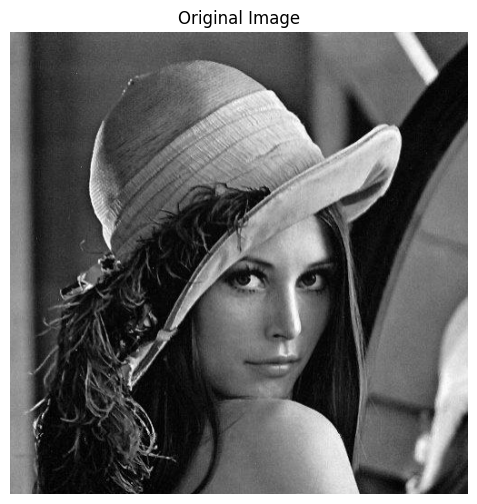

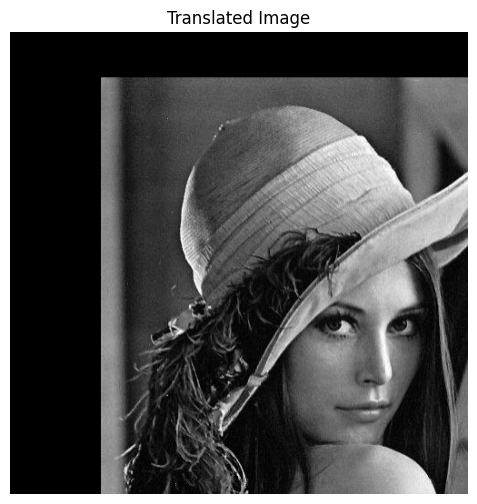

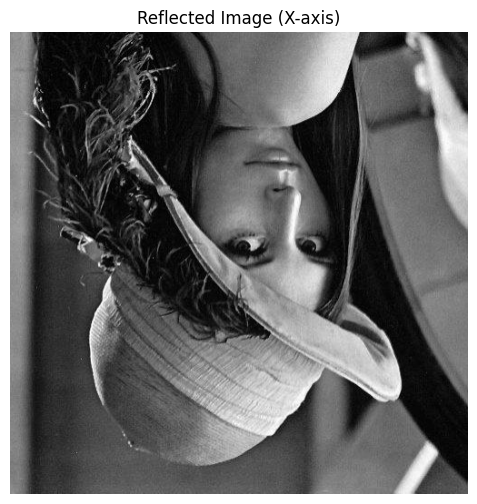

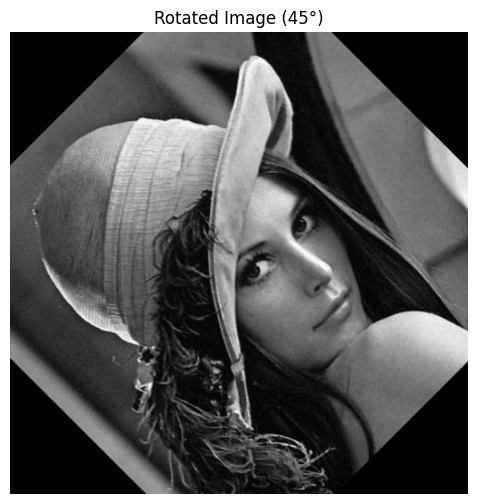

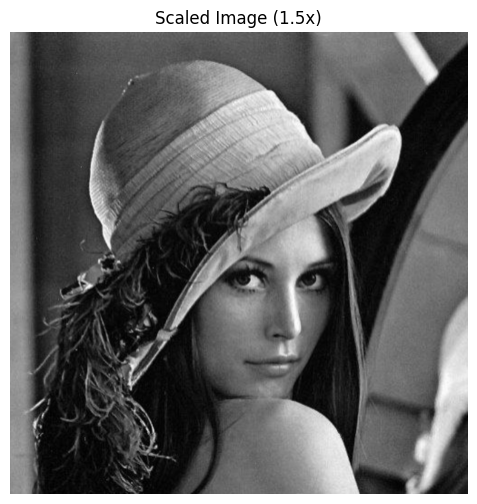

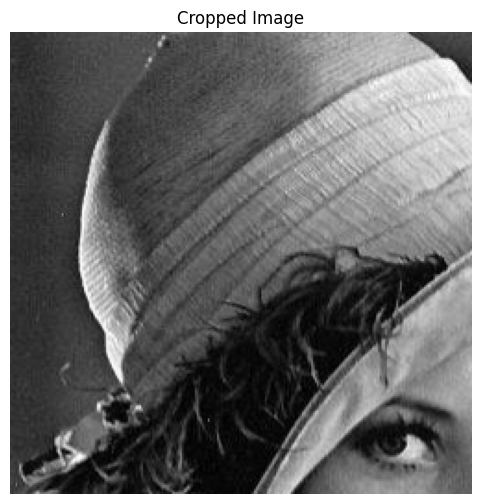

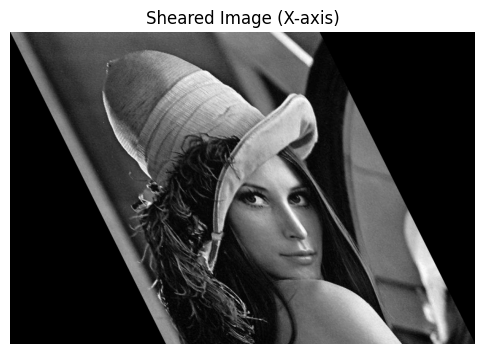

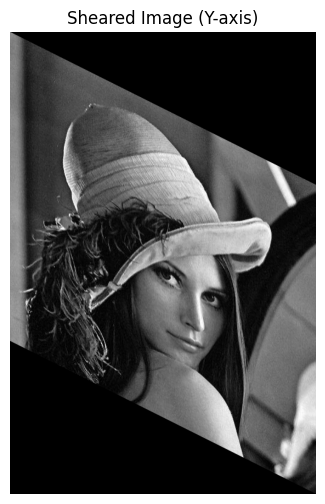

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def display_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image_path = r"/content/2025-01-20 09_02_16-Lab-1 B-9 10 11.pdf - Foxit PDF Reader.png"
image = cv2.imread(image_path)
display_image("Original Image", image)

# Image Translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

translated = translate_image(image, 100, 50)
display_image("Translated Image", translated)

# Image Reflection
def reflect_image(image, axis='x'):
    if axis == 'x':
        reflected_image = cv2.flip(image, 0)
    elif axis == 'y':
        reflected_image = cv2.flip(image, 1)
    else:  # Both axes
        reflected_image = cv2.flip(image, -1)
    return reflected_image

reflected = reflect_image(image, axis='x')
display_image("Reflected Image (X-axis)", reflected)

# Image Rotation
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

rotated = rotate_image(image, 45)
display_image("Rotated Image (45°)", rotated)

# Image Scaling
def scale_image(image, fx, fy):
    scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_image

scaled = scale_image(image, 1.5, 1.5)
display_image("Scaled Image (1.5x)", scaled)

# Image Cropping
def crop_image(image, start_row, start_col, end_row, end_col):
    cropped_image = image[start_row:end_row, start_col:end_col]
    return cropped_image

cropped = crop_image(image, 50, 50, 300, 300)
display_image("Cropped Image", cropped)

# Image Shearing in x-axis
def shear_image_x(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_image_x = cv2.warpAffine(image, shear_matrix, (int(cols + rows * shear_factor), rows))
    return sheared_image_x

sheared_x = shear_image_x(image, 0.5)
display_image("Sheared Image (X-axis)", sheared_x)

# Image Shearing in y-axis
def shear_image_y(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_image_y = cv2.warpAffine(image, shear_matrix, (cols, int(rows + cols * shear_factor)))
    return sheared_image_y

sheared_y = shear_image_y(image, 0.5)
display_image("Sheared Image (Y-axis)", sheared_y)